# **NOTEBOOK 2:**
## Mortality Rates and Life Expectancy in U.S. States by Race and Ethnicity 2000-2019

**Source:** https://ghdx.healthdata.org/record/ihme-data/united-states-life-expectancy-by-state-white-black-hispanic-race-ethnicity-1990-2019 

This notebook will explore the data in the file containing information about each state's population, mortality rate, and life expectancy by race/ethnicity, age, and gender from 1990 to 2019.

Given data about diabetes prevalence from Notebook 1, I will then focus on 5 states: Alabama, West Virginia, Mississippi, and South Carolina with the highest diabetes prevalence, and Colorado with the lowest diabetes prevalence for comparison - based on values (%) from 2017.

The goal is to see how life expectancy and mortality rate changed in these states every 5 years (1992, 1997, 2002, 2007, 2012, and 2017) and connect that to data about diabetes prevalence (from 2017).

After cleaning and adjusting the data set, I will make observations that will be make more general conclusions in support of the data exploration in the other notebooks.

### Setup data

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load and inspect the data

In [184]:
#create a data frame that contains all data
mortlife_df = pd.read_csv('../data/mortality.CSV')

In [185]:
#shape of data frame
nrows, ncols = mortlife_df.shape

print(f'Data frame has {nrows} rows and {ncols} columns.')

Data frame has 627300 rows and 16 columns.


In [186]:
#look at columns included in data set
print(mortlife_df.columns)

Index(['measure_id', 'measure_name', 'location_id', 'location_name',
       'state_name', 'race_ethnicity_group', 'sex_id', 'sex_name',
       'age_group_id', 'age_group_name', 'year_id', 'metric_id', 'metric_name',
       'val', 'upper', 'lower'],
      dtype='object')


In [187]:
#look at how data was logged for each column 
mortlife_df.sample(20)

,measure_id,measure_name,location_id,location_name,state_name,race_ethnicity_group,sex_id,sex_name,age_group_id,age_group_name,year_id,metric_id,metric_name,val,upper,lower
236787,44,Population,53747,"Pennsylvania; Hispanic, Any race",Pennsylvania,"Hispanic, Any race",2,Female,17,60 to 64,2017,1,Number,14423.393360,NaN,NaN
332693,44,Population,559,Oklahoma,Oklahoma,State-level,2,Female,28,<1 year,2013,1,Number,25348.470900,NaN,NaN
98878,44,Population,53740,"New Mexico; Hispanic, Any race",New Mexico,"Hispanic, Any race",2,Female,8,15 to 19,2018,1,Number,42501.075900,NaN,NaN
297815,44,Population,53844,"North Carolina; Non-Hispanic, Black",North Carolina,"Non-Hispanic, Black",2,Female,28,<1 year,1995,1,Number,13320.308950,NaN,NaN
427844,14,All-cause mortality rate,53738,"New Hampshire; Hispanic, Any race",New Hampshire,"Hispanic, Any race",2,Female,5,1 to 4,2004,3,Rate,NaN,NaN,NaN
553737,14,All-cause mortality rate,53848,"Oregon; Non-Hispanic, Black",Oregon,"Non-Hispanic, Black",2,Female,13,40 to 44,2017,3,Rate,0.001748,0.002780,0.000699
377996,14,All-cause mortality rate,559,Oklahoma,Oklahoma,State-level,2,Female,10,25 to 29,2016,3,Rate,0.000856,0.001004,0.000717
256010,44,Population,53878,"Kansas; Non-Hispanic, White",Kansas,"Non-Hispanic, White",2,Female,18,65 to 69,2010,1,Number,50030.807100,NaN,NaN
479126,14,All-cause mortality rate,53783,"Minnesota; Non-Hispanic, Other races",Minnesota,"Non-Hispanic, Other races",1,Male,5,1 to 4,2016,3,Rate,0.000567,0.000743,0.000401
374171,14,All-cause mortality rate,555,New York,New York,State-level,1,Male,160,85 plus,2001,3,Rate,0.169412,0.173364,0.165322


## Cleaning up data

In [188]:
#I noticed there were differnt numbers under 'measure_id'
#how many different valuess were used for this data set
mortlife_df['measure_id'].value_counts()

44    290700
14    290700
26     45900
Name: measure_id, dtype: int64

In [189]:
#get rid of unecessary columns and update data frame
mortlife_df = mortlife_df.drop(['location_name', 'location_id', 'measure_id', 'sex_id', 'age_group_id', 'metric_id'], axis=1)
mortlife_df.sample(15)

,measure_name,state_name,race_ethnicity_group,sex_name,age_group_name,year_id,metric_name,val,upper,lower
84745,Population,Maine,"Non-Hispanic, Other races",Female,10 to 14,2015,Number,1072.030225,NaN,NaN
310174,Population,Oregon,"Hispanic, Any race",Female,80 to 84,1994,Number,276.204094,NaN,NaN
577908,All-cause mortality rate,Delaware,"Non-Hispanic, White",Female,60 to 64,2008,Rate,0.007271,0.007780,0.006784
429078,All-cause mortality rate,New Jersey,"Hispanic, Any race",Male,10 to 14,2008,Rate,0.000142,0.000185,0.000099
176894,Population,New Mexico,"Non-Hispanic, Other races",Female,40 to 44,2004,Number,7937.428594,NaN,NaN
241180,Population,New York,"Non-Hispanic, White",Female,60 to 64,2000,Number,271549.845100,NaN,NaN
586859,All-cause mortality rate,Iowa,"Non-Hispanic, White",Female,45 to 49,2019,Rate,0.002239,0.002363,0.002122
539890,All-cause mortality rate,Missouri,"Non-Hispanic, Black",Male,30 to 34,2000,Rate,0.003372,0.003908,0.002824
317319,Population,Maryland,"Hispanic, Any race",Male,85 plus,1999,Number,189.523638,NaN,NaN
158783,Population,Rhode Island,State-level,Female,35 to 39,2013,Number,30675.930450,NaN,NaN


In [190]:
#are there any inconsistencies in name values
mortlife_df['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [191]:
#how many obervations does each measurement have
mortlife_df['measure_name'].value_counts()

Population                  290700
All-cause mortality rate    290700
Life expectancy              45900
Name: measure_name, dtype: int64

In [192]:
#make a new column with abbreviated names for measurements, to be easier to use
measure_abbrev_dict = {
    'Population': 'pop',
    'All-cause mortality rate': 'mort',
    'Life expectancy': 'life'
}

mortlife_df['measure_short'] = mortlife_df['measure_name'].replace(measure_abbrev_dict)

#make sure everything copied correclty
mortlife_df.sample(10)[['measure_name', 'measure_short']]

,measure_name,measure_short
101610,Population,pop
13207,Life expectancy,life
311400,Population,pop
235509,Population,pop
42892,Life expectancy,life
360543,All-cause mortality rate,mort
109558,Population,pop
159863,Population,pop
495259,All-cause mortality rate,mort
146109,Population,pop


In [193]:
#how many observations for each age group 
mortlife_df['age_group_name'].value_counts()

40 to 44    30600
45 to 49    30600
80 to 84    30600
<1 year     30600
75 to 79    30600
70 to 74    30600
65 to 69    30600
60 to 64    30600
55 to 59    30600
50 to 54    30600
85 plus     30600
35 to 39    30600
30 to 34    30600
25 to 29    30600
20 to 24    30600
15 to 19    30600
10 to 14    30600
5 to 9      30600
1 to 4      30600
65          15300
Birth       15300
25          15300
Name: age_group_name, dtype: int64

In [194]:
#adjust 65, birth, and 25, data into the right categories
age_value_map_dict = {
    '25' : '25 to 29',
    '65' : '65 to 69',
    'Birth' : '<1 year'
}

mortlife_df['age_group_name'] = mortlife_df['age_group_name'].replace(age_value_map_dict)

#make sure everything copied correclty
mortlife_df['age_group_name'].value_counts()

25 to 29    45900
<1 year     45900
65 to 69    45900
45 to 49    30600
80 to 84    30600
75 to 79    30600
70 to 74    30600
60 to 64    30600
55 to 59    30600
50 to 54    30600
35 to 39    30600
40 to 44    30600
30 to 34    30600
20 to 24    30600
15 to 19    30600
10 to 14    30600
5 to 9      30600
1 to 4      30600
85 plus     30600
Name: age_group_name, dtype: int64

In [195]:
#replace age group categories with smaller set of life stages
age_group_map_dict = {
    '<1 year' : 'inf',
    '1 to 4' : 'child',
    '5 to 9' : 'child',
    '10 to 14' : 'child',
    '15 to 19' : 'teen',
    '20 to 24' : 'ya',
    '25 to 29' : 'ya',
    '30 to 34' : 'ad',
    '35 to 39' : 'ad',
    '40 to 44' : 'ad',
    '45 to 49' : 'ad',
    '50 to 54' : 'ad',
    '55 to 59' : 'ad',
    '60 to 64' : 'eld',
    '65 to 69' : 'eld',
    '70 to 74' : 'eld',
    '75 to 79' : 'eld',
    '80 to 84' : 'eld',
    '85 plus' : 'eld'
}

mortlife_df['age_short'] = mortlife_df['age_group_name'].replace(age_group_map_dict)

#make sure everything copied correctly
mortlife_df.sample(10)[['age_group_name', 'age_short']]

,age_group_name,age_short
489236,<1 year,inf
621695,5 to 9,child
183554,45 to 49,ad
272335,70 to 74,eld
280973,75 to 79,eld
296198,<1 year,inf
514404,85 plus,eld
174459,40 to 44,ad
19312,25 to 29,ya
216897,55 to 59,ad


In [196]:
#how many observations for each age group category after editing
mortlife_df['age_short'].value_counts()

eld      198900
ad       183600
child     91800
ya        76500
inf       45900
teen      30600
Name: age_short, dtype: int64

In [197]:
#how many observations for each race/ethnicity
mortlife_df['race_ethnicity_group'].value_counts()

State-level                  125460
Hispanic, Any race           125460
Non-Hispanic, Other races    125460
Non-Hispanic, Black          125460
Non-Hispanic, White          125460
Name: race_ethnicity_group, dtype: int64

In [198]:
#add a new column for ethnicity/race abbrev
ethnicity_abbrev_dict = {
    'State-level': 'sl',
    'Hispanic, Any race': 'h', 
    'Non-Hispanic, Other races': 'onh', 
    'Non-Hispanic, Black': 'bnh',
    'Non-Hispanic, White': 'wnh'
}

mortlife_df['eth_short'] = mortlife_df['race_ethnicity_group'].replace(ethnicity_abbrev_dict)

#make sure everything transferred correclty
mortlife_df.sample(10)[['race_ethnicity_group', 'eth_short']]

,race_ethnicity_group,eth_short
162406,"Non-Hispanic, Black",bnh
390652,State-level,sl
81789,State-level,sl
135955,State-level,sl
321184,"Non-Hispanic, Black",bnh
87113,"Non-Hispanic, Black",bnh
603564,"Non-Hispanic, White",wnh
444360,"Hispanic, Any race",h
77730,"Non-Hispanic, Other races",onh
258714,"Hispanic, Any race",h


In [199]:
#how many observations per gender
mortlife_df['sex_name'].value_counts()

Male      313650
Female    313650
Name: sex_name, dtype: int64

In [200]:
#make a new column for abbreviated gender
sex_abbrev_dict = {
    'Male' : 'm',
    'Female' : 'f'
}

mortlife_df['sex'] = mortlife_df['sex_name'].replace(sex_abbrev_dict)

#make sure everything transferred correctly
mortlife_df.sample(10)[['sex_name', 'sex']]

,sex_name,sex
393001,Male,m
361195,Female,f
145838,Female,f
2809,Female,f
424646,Male,m
35082,Female,f
416521,Male,m
179311,Female,f
145732,Female,f
415781,Female,f


In [201]:
#check new data frame
mortlife_df.sample(10)

,measure_name,state_name,race_ethnicity_group,sex_name,age_group_name,year_id,metric_name,val,upper,lower,measure_short,age_short,eth_short,sex
472472,All-cause mortality rate,Kentucky,"Non-Hispanic, Other races",Female,15 to 19,1992,Rate,NaN,NaN,NaN,mort,teen,onh,f
55172,Population,Arkansas,"Non-Hispanic, Black",Female,1 to 4,1992,Number,15710.883240,NaN,NaN,pop,child,bnh,f
476236,All-cause mortality rate,Maryland,"Non-Hispanic, Other races",Male,45 to 49,2006,Rate,0.001531,0.002011,0.001064,mort,ad,onh,m
292482,Population,District of Columbia,"Non-Hispanic, White",Male,<1 year,2002,Number,790.466533,NaN,NaN,pop,inf,wnh,m
99258,Population,Utah,"Hispanic, Any race",Female,15 to 19,2008,Number,14632.859070,NaN,NaN,pop,teen,h,f
197806,Population,Indiana,"Hispanic, Any race",Male,50 to 54,2006,Number,6272.800637,NaN,NaN,pop,ad,h,m
47920,Population,Kansas,"Non-Hispanic, Other races",Male,1 to 4,2000,Number,2619.927827,NaN,NaN,pop,child,onh,m
592356,All-cause mortality rate,Maryland,"Non-Hispanic, White",Female,30 to 34,1996,Rate,0.000522,0.000591,0.000467,mort,ad,wnh,f
308838,Population,Texas,State-level,Female,80 to 84,2008,Number,199748.283500,NaN,NaN,pop,eld,sl,f
395151,All-cause mortality rate,Alabama,"Hispanic, Any race",Female,30 to 34,2011,Rate,NaN,NaN,NaN,mort,ad,h,f


In [202]:
#create a simplified data frame for population, mortality rate, and life exp
#inlcuding abbreviated sex, age group, and race/ethnicity data
mortlife_simple_df = mortlife_df[['state_name','year_id','measure_short', 'sex','age_short','eth_short','val']]

#check simplified data frame
mortlife_simple_df.sample(10)

,state_name,year_id,measure_short,sex,age_short,eth_short,val
556502,Rhode Island,1992,mort,m,eld,bnh,0.143345
180869,Georgia,2019,pop,m,ad,sl,348329.733500
377974,Oklahoma,1994,mort,f,ya,sl,0.000700
288546,New Jersey,1996,pop,m,inf,h,9756.084556
517501,Colorado,1991,mort,m,eld,bnh,0.034352
399985,California,2015,mort,m,ad,h,0.006908
474795,Maine,2005,mort,m,ya,onh,NaN
69658,Montana,2018,pop,f,child,onh,3769.404504
439516,Rhode Island,2006,mort,m,ya,h,NaN
369619,Nevada,2009,mort,m,eld,sl,0.159277


In [203]:
#shape of simplified data frame
mortlife_simple_df.shape

(627300, 7)

In [204]:
#save simplified data frame as a new csv file
mortlife_simple_df.to_csv('../data/mortlife_simple.csv', index=False)

## Set up for Data Exploration

Now that I have a simplified data frame to work with, I will need to create filters and loops to generate data frame subsets based of measure type, state, race/ethnicity, age group, and year.

In [205]:
#filters for measures
lifeExp_filter = mortlife_simple_df['measure_short']=='life'
mort_filter = mortlife_simple_df['measure_short']=='mort'
pop_filter = mortlife_simple_df['measure_short']=='pop'

#filters for ethnicity/race groups
statelevel_filter = mortlife_simple_df['eth_short']=='sl'
no_statelevel_filter = ~(mortlife_simple_df['eth_short']=='sl')
hispanic_filter = mortlife_simple_df['eth_short']=='h'
white_filter = mortlife_simple_df['eth_short']=='wnh'
black_filter = mortlife_simple_df['eth_short']== 'bnh'
other_race_filter = mortlife_simple_df['eth_short']== 'onh'

#filters for age groups
infant_filter = mortlife_simple_df['age_short'] == 'inf'
child_filter = mortlife_simple_df['age_short'] == 'child'
teen_filter = mortlife_simple_df['age_short'] == 'teen'
ya_filter = mortlife_simple_df['age_short'] == 'ya'
adult_filter = mortlife_simple_df['age_short'] == 'ad'
elder_filter = mortlife_simple_df['age_short'] == 'eld'

#filters for years of interest (simplify analaysis to just 5 year marks)
key_years = [1992, 1997, 2002, 2007, 2012, 2017]
filter_2017 = mortlife_simple_df['year_id'] == 2017
year_filter = mortlife_simple_df['year_id'].isin(key_years)

#filters for states of interest (based on different diabetes prevalence levels)
key_states = ['Alabama', 'West Virginia', 'Mississippi', 'South Carolina', 'Colorado']
state_filter = mortlife_simple_df['state_name'].isin(key_states)

In [206]:
#lists for each variable in data frame to be used in functions
years = mortlife_simple_df['year_id'].unique()
measures = mortlife_simple_df['measure_short'].unique()
eth_race = mortlife_simple_df['eth_short'].unique()
ages = mortlife_simple_df['age_short'].unique()
states = mortlife_simple_df['state_name'].unique()

In [207]:
#function to create a data frame based off year
year_df = {}
for year in years:
    yfilter = mortlife_simple_df['year_id']==year
    year_df[year] = mortlife_simple_df[yfilter]
    
#function to create a data frame based off measure type
measure_df = {}
for measure in measures:
    mfilter = mortlife_simple_df['measure_short']==measure
    measure_df[measure] = mortlife_simple_df[mfilter]

#function to create a data frame based off race/ethnicity
eth_df = {}
for eth in eth_race:
    efilter = mortlife_simple_df['eth_short']==eth
    eth_df[eth] = mortlife_simple_df[efilter]

#function to create a data frame based off age group
age_df = {}
for age in ages:
    afilter = mortlife_simple_df['age_short']==age
    age_df[age] = mortlife_simple_df[afilter]

#function to create a data frame based off state
state_df = {}
for state in states:
    sfilter = mortlife_simple_df['state_name']==state
    state_df[state] = mortlife_simple_df[sfilter]

## Data Exploration

Now I can look at the data more closely and create plots to make observations.

### Life Expectancy

In [208]:
#data frame for life expectancy data only - all states
lifeExp_df = measure_df['life']
lifeExp_df.sample(10)

,state_name,year_id,measure_short,sex,age_short,eth_short,val
9315,Alabama,2005,life,m,inf,h,NaN
33583,North Carolina,2003,life,f,eld,bnh,17.690367
18884,Arizona,2004,life,f,inf,onh,80.582724
43880,Rhode Island,2010,life,m,inf,wnh,76.958132
4138,Michigan,2018,life,f,inf,sl,80.300441
1865,Georgia,1995,life,m,eld,sl,14.714943
6301,Ohio,1991,life,m,ya,sl,49.139393
6991,Pennsylvania,1991,life,f,inf,sl,79.115447
41181,Mississippi,2011,life,m,inf,wnh,73.248357
33273,New Mexico,1993,life,f,inf,bnh,76.270065


In [209]:
#notice that life expectancy is measuring how many years person is expeted to live based on
##their age at the time of data collection

#create a new fucntion to adjist life Exp by age group (based on avergae age of group)
def adjust_lifeExp(df):
    df.loc[df['age_short'] == 'inf', 'val'] += 0
    df.loc[df['age_short'] == 'child', 'val'] += 7
    df.loc[df['age_short'] == 'teen', 'val'] += 17
    df.loc[df['age_short'] == 'ya', 'val'] += 25
    df.loc[df['age_short'] == 'ad', 'val'] += 45
    df.loc[df['age_short'] == 'eld', 'val'] += 75
    return df

In [210]:
lifeExp_df = adjust_lifeExp(lifeExp_df)
lifeExp_df

,state_name,year_id,measure_short,sex,age_short,eth_short,val
0,Alabama,1990,life,m,ya,sl,72.401899
1,Alabama,1991,life,m,ya,sl,72.293256
2,Alabama,1992,life,m,ya,sl,72.667564
3,Alabama,1993,life,m,ya,sl,72.826836
4,Alabama,1994,life,m,ya,sl,72.718326
...,...,...,...,...,...,...,...
45895,Wyoming,2015,life,f,inf,wnh,81.327728
45896,Wyoming,2016,life,f,inf,wnh,81.751492
45897,Wyoming,2017,life,f,inf,wnh,81.472115
45898,Wyoming,2018,life,f,inf,wnh,81.629400


In [211]:
#state data for life expectancy by year and sex for key years and states (not by race or age group)
lifeExp_key_df = lifeExp_df[state_filter & year_filter]
lifeExp_key = lifeExp_key_df.groupby(['state_name','year_id']).mean('val')
lifeExp_key

val
state_name     year_id           
Alabama        1992     80.079268
               1997     79.986113
               2002     80.105190
               2007     80.680442
               2012     81.197830
               2017     81.349411
Colorado       1992     83.481468
               1997     83.476278
               2002     83.966202
               2007     85.369705
               2012     85.539777
               2017     85.670515
Mississippi    1992     79.836994
               1997     79.686600
               2002     79.710484
               2007     80.555317
               2012     80.986223
               2017     80.875171
South Carolina 1992     80.123835
               1997     80.485929
               2002     80.672237
               2007     81.711967
               2012     82.400313
               2017     82.199624
West Virginia  1992     79.499981
               1997     79.781933
               2002     80.312548
               2007     80.667301
               2012     81.015396
               2017     81.112867

In [229]:
lifeExp_key_df.to_csv('../data/lifeExp_key.csv', index=False)

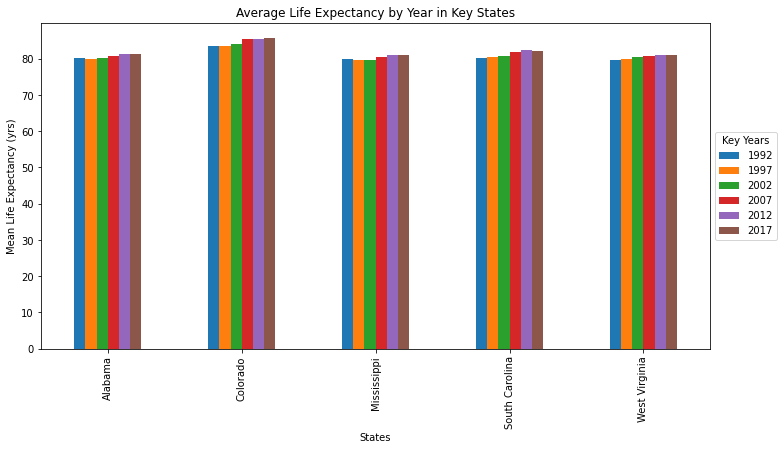

In [212]:
pivoted_lifeExp_key = lifeExp_key.reset_index().pivot(index='state_name', columns=['year_id'], values='val')

pivoted_lifeExp_key.plot(kind='bar', figsize=(12,6))
plt.xlabel('States')
plt.ylabel('Mean Life Expectancy (yrs)')
plt.title('Average Life Expectancy by Year in Key States')
plt.legend(title='Key Years', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Observations:
- States with higher diabetes prevalence tend to have a lower life expectancy compared to Colorado with the lowest prevalence.
- Life expectancy tends to increase over time for all states

In [213]:
#state data for life expectancy for key states in 2017 by age group
lifeExp_2017_df = lifeExp_df[state_filter & filter_2017]
lifeExp_2017 = lifeExp_2017_df.groupby(['state_name','year_id','eth_short']).mean('val')
lifeExp_2017

val
state_name     year_id eth_short           
Alabama        2017    bnh        80.354810
                       h                NaN
                       onh              NaN
                       sl         81.760324
                       wnh        81.933101
Colorado       2017    bnh        83.531796
                       h          85.102441
                       onh        88.800590
                       sl         85.405651
                       wnh        85.512097
Mississippi    2017    bnh        79.697672
                       h                NaN
                       onh              NaN
                       sl         81.191363
                       wnh        81.736477
South Carolina 2017    bnh        80.642420
                       h                NaN
                       onh              NaN
                       sl         82.775300
                       wnh        83.181152
West Virginia  2017    bnh        80.200375
                       h                NaN
                       onh              NaN
                       sl         81.624836
                       wnh        81.513389

In [230]:
lifeExp_2017_df.to_csv('../data/lifeExp_2017.csv', index=False)

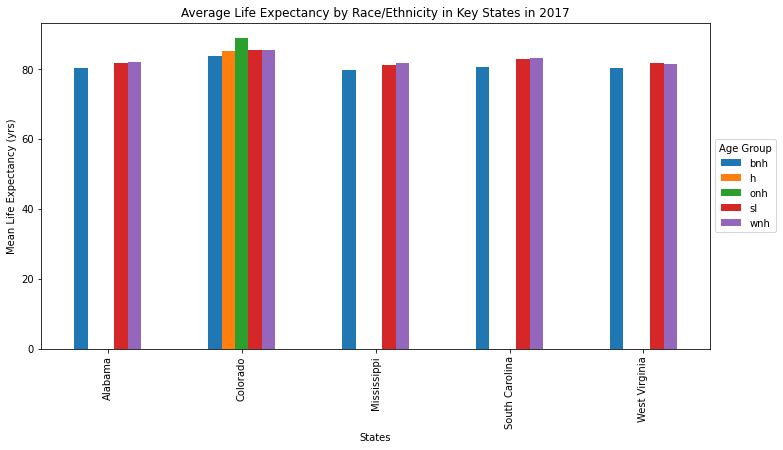

In [214]:
#create a plot by pivoting data set
wide_lifeExp_2017 = lifeExp_2017.reset_index().pivot(index='state_name', columns='eth_short', values='val')

wide_lifeExp_2017.plot(kind='bar', figsize=(12,6))
plt.xlabel('States')
plt.ylabel('Mean Life Expectancy (yrs)')
plt.title('Average Life Expectancy by Race/Ethnicity in Key States in 2017')
plt.legend(title='Age Group', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Observations:
- There is no data reported for race/ethnicity other than Black (non-Hispanic) and White (non-Hispanic), except for Colorado.
- In all cases, life expectancy is better for White groups (purple), compared to the state average (red).
- In every state but Colorado, life expectancy is greater for White (purple) than Black groups (blue).
- In Colorado, the Other Race (non-Hispanic) group has the highest life expectancy, greater than the state average (red).

### Mortality Rate

In [215]:
#data frame for mortality data only
mort_df = measure_df['mort']

In [216]:
#state data for mortality rate by year for key years and states (not by sex, race, or age group)
mort_key_df = mort_df[state_filter & year_filter]
mort_key_df

,state_name,year_id,measure_short,sex,age_short,eth_short,val
336602,Alabama,1992,mort,m,child,sl,0.000586
336607,Alabama,1997,mort,m,child,sl,0.000546
336612,Alabama,2002,mort,m,child,sl,0.000465
336617,Alabama,2007,mort,m,child,sl,0.000457
336622,Alabama,2012,mort,m,child,sl,0.000407
...,...,...,...,...,...,...,...
624997,West Virginia,1997,mort,f,eld,wnh,0.157649
625002,West Virginia,2002,mort,f,eld,wnh,0.169754
625007,West Virginia,2007,mort,f,eld,wnh,0.155582
625012,West Virginia,2012,mort,f,eld,wnh,0.155158


In [217]:
#multiply rate by 100 to get %
mort_key_df['val']= mort_key_df['val'].multiply(100)
mort_key = mort_key_df.groupby(['state_name','year_id']).mean('val')
mort_key

val
state_name     year_id          
Alabama        1992     2.289379
               1997     2.337831
               2002     2.396657
               2007     2.240287
               2012     2.124068
               2017     2.049508
Colorado       1992     1.889767
               1997     1.914431
               2002     1.856314
               2007     1.633724
               2012     1.593406
               2017     1.544369
Mississippi    1992     2.278902
               1997     2.366228
               2002     2.409953
               2007     2.225413
               2012     2.143747
               2017     2.139094
South Carolina 1992     2.268811
               1997     2.235099
               2002     2.279862
               2007     2.039315
               2012     1.961622
               2017     1.949294
West Virginia  1992     2.460228
               1997     2.477067
               2002     2.385004
               2007     2.247422
               2012     2.126453
               2017     2.010186

In [231]:
mort_key_df.to_csv('../data/mort_key.csv', index=False)

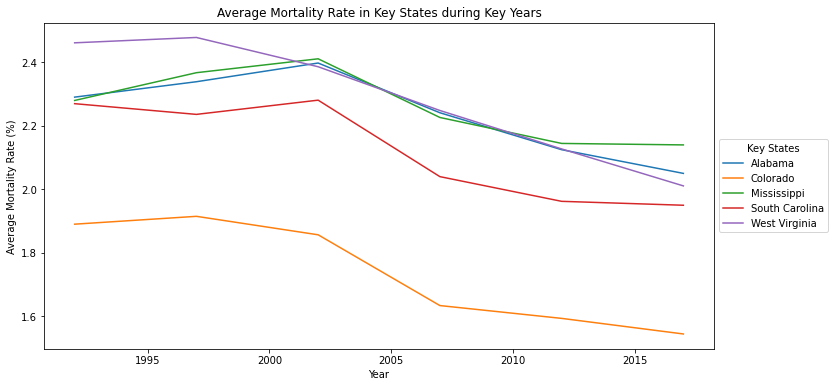

In [218]:
#create a plot by pivoting data set
wide_mort_key = mort_key.reset_index().pivot(index='year_id', columns='state_name', values='val')

wide_mort_key.plot(kind='line', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Average Mortality Rate in Key States during Key Years')
plt.legend(title='Key States', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Observations:
- Mortality rate is greatest for Alabama, West Virginia, and Mississippi, which also happen to be the states with the highest diabetes prevalence. They follow as similar rate of decline.
- South Carolina saw an increase from 2000 to 2005, but then started decreasing at different rates for the last 10 years.
- Mortality rate generally declines in all states.
- However, Mississippi and South Carolina are starting to show a rise in mortality rate.
- Colorado has continued to decrease.

In [219]:
#state data for mortality rate by year for key states in 2017 (not by sex, race, or age group)
mort_2017_df = mort_df[state_filter & filter_2017]
mort_2017_df

,state_name,year_id,measure_short,sex,age_short,eth_short,val
336627,Alabama,2017,mort,m,child,sl,0.000426
336657,Alabama,2017,mort,f,child,sl,0.000300
336687,Alabama,2017,mort,m,child,sl,0.000105
336717,Alabama,2017,mort,f,child,sl,0.000156
336747,Alabama,2017,mort,m,child,sl,0.000304
...,...,...,...,...,...,...,...
624897,West Virginia,2017,mort,f,inf,wnh,0.005899
624927,West Virginia,2017,mort,m,eld,wnh,0.079112
624957,West Virginia,2017,mort,f,eld,wnh,0.060029
624987,West Virginia,2017,mort,m,eld,wnh,0.159813


In [220]:
#multiply rate by 100 to get %
mort_2017_df['val']= mort_2017_df['val'].multiply(100)
mort_2017 = mort_2017_df.groupby(['state_name','year_id','eth_short']).mean('val')
mort_2017

val
state_name     year_id eth_short          
Alabama        2017    bnh        2.116093
                       h               NaN
                       onh             NaN
                       sl         2.012886
                       wnh        2.019545
Colorado       2017    bnh        1.738621
                       h          1.566505
                       onh        1.194190
                       sl         1.608149
                       wnh        1.614380
Mississippi    2017    bnh        2.246319
                       h               NaN
                       onh             NaN
                       sl         2.101141
                       wnh        2.069823
South Carolina 2017    bnh        2.107943
                       h               NaN
                       onh             NaN
                       sl         1.884350
                       wnh        1.855590
West Virginia  2017    bnh        2.118384
                       h               NaN
                       onh             NaN
                       sl         1.947740
                       wnh        1.964434

In [232]:
mort_2017_df.to_csv('../data/mort_2017.csv', index=False)

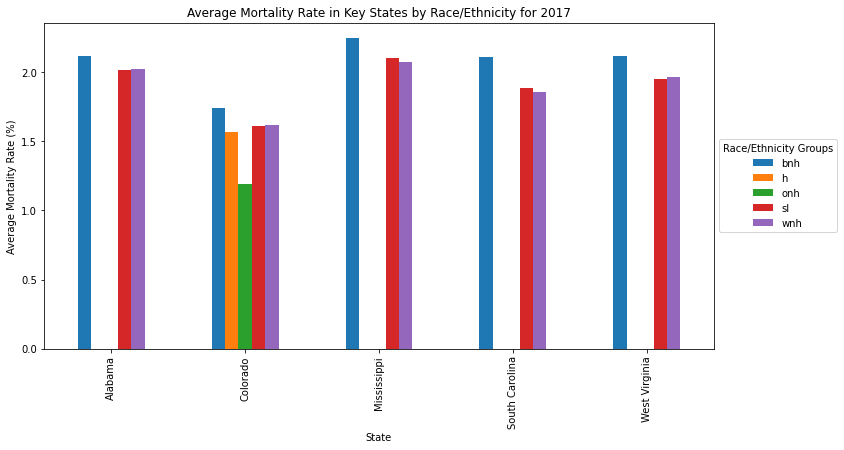

In [221]:
#create a plot by pivoting data set
wide_mort_2017 = mort_2017.reset_index().pivot(index='state_name', columns='eth_short', values='val')

wide_mort_2017.plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Average Mortality Rate (%)')
plt.title('Average Mortality Rate in Key States by Race/Ethnicity for 2017')
plt.legend(title='Race/Ethnicity Groups', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Observations:
- There is no mortality rate data for race/ethnicity categories other than Black (non-Hispanic) and White (non-Hispanic) except in Colorado where all are present.
- In all cases, Black groups (blue) have the highest mortality rate, above state average (red).
- This is especially true in states with the greatest diabetes prevalence during this year (Alabama, West Virginia, Mississippi, and South Carolina).

### Population 

In [222]:
#data frame for population data only
pop_df = measure_df['pop']

In [223]:
#state data for population count by year for key years and states (not by sex, race, or age group)
pop_key_df = pop_df[state_filter & year_filter]
pop_key_df

,state_name,year_id,measure_short,sex,age_short,eth_short,val
45902,Alabama,1992,pop,m,child,h,1079.107183
45907,Alabama,1997,pop,m,child,h,2269.590260
45912,Alabama,2002,pop,m,child,h,4590.615713
45917,Alabama,2007,pop,m,child,h,8159.438378
45922,Alabama,2012,pop,m,child,h,10209.655540
...,...,...,...,...,...,...,...
336457,West Virginia,1997,pop,f,child,sl,41177.444340
336462,West Virginia,2002,pop,f,child,sl,40516.014850
336467,West Virginia,2007,pop,f,child,sl,41133.662940
336472,West Virginia,2012,pop,f,child,sl,40190.217230


In [233]:
pop_key_df.to_csv('../data/port_key.csv', index=False)

In [224]:
#create a table for pop by year
pop_key = pop_key_df.groupby(['state_name','year_id']).sum('val')/2
pop_key

val
state_name     year_id              
Alabama        1992     4.170659e+06
               1997     4.323271e+06
               2002     4.497848e+06
               2007     4.674303e+06
               2012     4.835847e+06
               2017     4.967843e+06
Colorado       1992     3.506571e+06
               1997     3.976443e+06
               2002     4.454821e+06
               2007     4.825224e+06
               2012     5.179215e+06
               2017     5.567734e+06
Mississippi    1992     2.656127e+06
               1997     2.763989e+06
               2002     2.868123e+06
               2007     2.938878e+06
               2012     2.974100e+06
               2017     2.975633e+06
South Carolina 1992     3.635770e+06
               1997     3.846121e+06
               2002     4.108707e+06
               2007     4.425697e+06
               2012     4.737132e+06
               2017     4.996673e+06
West Virginia  1992     1.806557e+06
               1997     1.792116e+06
               2002     1.810383e+06
               2007     1.842073e+06
               2012     1.850648e+06
               2017     1.823248e+06

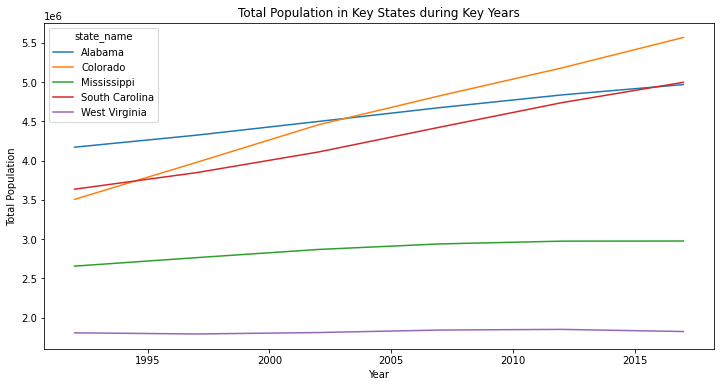

In [225]:
#create a graph
wide_pop_key = pop_key.reset_index().pivot(index='year_id', columns='state_name', values='val')

wide_pop_key.plot(kind='line', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population in Key States during Key Years')
plt.show()

Observations:
- Population remains fairly constant in Mississippi and West Virginia, with slight increase but not very much in the latter.
- Alabama and South Carolina show a more noticeable increase in population over the last 30 years.
- Colorado has increased to be greater than the other four states by 2017, despite being third largest in 1990.

In [226]:
#state data for population count by year for key years and states (not by sex, race, or age group)
pop_2017_df = pop_df[state_filter & filter_2017 & no_statelevel_filter]
pop_2017_df

,state_name,year_id,measure_short,sex,age_short,eth_short,val
45927,Alabama,2017,pop,m,child,h,10115.109350
46077,Colorado,2017,pop,m,child,h,42497.331630
46647,Mississippi,2017,pop,m,child,h,4182.873025
47127,South Carolina,2017,pop,m,child,h,11887.541140
47367,West Virginia,2017,pop,m,child,h,1118.548865
...,...,...,...,...,...,...,...
328977,Alabama,2017,pop,f,eld,wnh,44834.151490
329127,Colorado,2017,pop,f,eld,wnh,45859.115360
329697,Mississippi,2017,pop,f,eld,wnh,23782.419220
330177,South Carolina,2017,pop,f,eld,wnh,40756.171170


In [234]:
pop_2017_df.to_csv('../data/port_2017.csv', index=False)

In [227]:
#create a table by race/ethnicity
pop_2017 = pop_2017_df.groupby(['state_name','year_id','eth_short']).sum('val')/2
pop_2017

val
state_name     year_id eth_short              
Alabama        2017    bnh        6.721592e+05
                       h          1.079829e+05
                       onh        5.483977e+04
                       wnh        1.648939e+06
Colorado       2017    bnh        1.280206e+05
                       h          5.984676e+05
                       onh        1.237515e+05
                       wnh        1.933627e+06
Mississippi    2017    bnh        5.643333e+05
                       h          4.801381e+04
                       onh        2.473063e+04
                       wnh        8.507390e+05
South Carolina 2017    bnh        6.872787e+05
                       h          1.428339e+05
                       onh        5.646731e+04
                       wnh        1.611757e+06
West Virginia  2017    bnh        3.637317e+04
                       h          1.474247e+04
                       onh        1.036916e+04
                       wnh        8.501393e+05

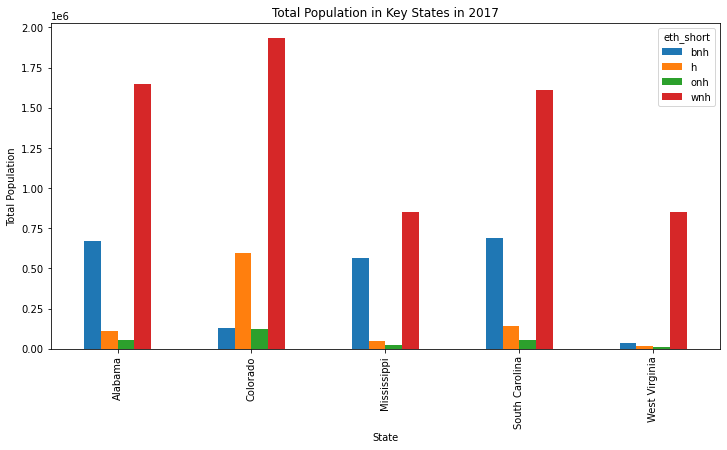

In [228]:
#create a graph for population in 2017
wide_pop_2017 = pop_2017.reset_index().pivot(index='state_name', columns='eth_short', values='val')

wide_pop_2017.plot(kind='bar', figsize=(12,6))
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population in Key States in 2017')
plt.show()

Observations:
- Agreeing with the graph above, Colorado has the greatest population size in 2017.
- In all states, the majority of the population is White (non-Hispanic).
- States with the greatest diabetes prevalence have much greater White populations (non-Hispanic), yet the Black population has a greater mortality rate despite the smaller size. This is especially true for West Virginia which a very small Black population.

## Next step

I will look at data about counties' income, education level, employment, and insurance coverage and connect it with diabetes prevalence rate in 2017, in the following notebooks.